# Tapping into Trends: Iowa Liquor Sales Analysis for Market Entry
___

___

### Introduction: 

CraftFlow Consulting is collaborating with Northfield Holdings Ltd., a prominent regional holding company that manages a network of liquor stores across the Midwest. Our primary objective is to facilitate Northfield’s strategic expansion into Iowa by pinpointing underserved markets with significant sales potential. By leveraging data-driven insights, we will analyze top-performing products and categories, assess seasonal and regional sales trends, and identify operational inefficiencies. Our goal is to drive profitability, streamline resource allocation, and provide actionable recommendations to support Northfield’s successful market entry and sustained growth in Iowa.

### The Analytical Journey


#### Iowa's Market Potential for Liquor Store Expansion

Iowa offers significant opportunities for liquor store expansion, driven by several key factors:

- **Controlled State with Transparent Sales Data**: Iowa’s status as a controlled state provides clear, accessible sales data for accurate market analysis.
- **Underserved Markets**: Suburban and rural areas present untapped demand for a wider variety of alcoholic beverages.
- **Strategic Location**: Iowa’s central location in the Midwest ensures efficient distribution, reducing transportation costs.
- **Strong Economic Indicators**: A stable economy, low unemployment, and rising disposable income support growth in consumer spending on alcohol.
- **Emerging Consumer Trends**: Shifting demographics, especially among younger and more affluent consumers, offer potential for brand loyalty and sustained market penetration.

With its favorable economic climate and emerging market opportunities, Iowa is an ideal state for liquor store expansion, offering a strong return on investment.


### Data Source:
The data used in this analysis was sourced from Iowa's public liquor sales database, covering the period from November 1, 2023, to October 31, 2024. This one-year dataset was selected to capture the full range of seasonal variations and trends, providing a comprehensive view of sales patterns throughout the year. The data source is accessible via Iowa’s public database:  
[**Iowa Liquor Sales Data**](https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy/about_data).  

We intentionally excluded data from December (which was not yet complete) to ensure the dataset covered a full year for more accurate analysis and trend forecasting.


### Dataset Reasoning:
_This dataset was selected for its comprehensive coverage of Iowa Liquor sales, product data, and regional performance. It provides valuable insights into customer preferences, market trends, and store operations, which are essential for strategic decision-making in areas such as marketing, inventory management, and regional expansion._

**Product Preferences:**
* Identify high-demand products and categories to inform inventory and marketing strategies.
* Highlight products or categories with negative sales, helping to pinpoint inefficiencies or pricing issues.

**Seasonal Trends:**
* Understand sales variations between holidays, weekends, and weekdays, offering insights into staffing, inventory, and marketing optimization.
* Identify top-performing products during holidays, revealing consumer behavior and aiding in stocking high-demand items.
* Recognize holidays that generate the most sales, helping to focus efforts on key retail periods.

**Regional Performance:**
* Analyze sales and profit data by county to identify high-performing and underperforming regions.
* Evaluate store-level performance to highlight successful locations and best practices for replication.
* Perform city-level sales analysis to uncover regional trends and identify new market opportunities.
* Identify regions with low sales but high potential, guiding targeted expansion into underserved markets and helping capture untapped demand in areas with little competition.


### Key Objectives of the Analysis:
This report aims to identify high-demand products, seasonal trends, and regional performance to optimize marketing, inventory, and expansion strategies. By analyzing sales patterns, consumer preferences, and market opportunities, the findings will guide targeted efforts to improve profitability. Additionally, it highlights inefficiencies and underserved regions to inform corrective actions and strategic growth. 

The insights derived from this analysis should serve as a foundation for the decision-making process during the expansion project, ensuring that strategies are aligned with market demands and growth potential.


### Loading data from .zip file

Please load Project_Data.zip in the same directory as the notebook

In [1]:
! unzip Project_Data.zip

Archive:  Project_Data.zip
  inflating: Iowa_Liquor_Sales.csv   
  inflating: __MACOSX/._Iowa_Liquor_Sales.csv  
   creating: Graphs/
  inflating: Graphs/monthly_graph.png  
  inflating: __MACOSX/Graphs/._monthly_graph.png  
  inflating: Graphs/product_graph.png  
  inflating: __MACOSX/Graphs/._product_graph.png  
  inflating: Graphs/category_graph.png  
  inflating: __MACOSX/Graphs/._category_graph.png  
  inflating: Graphs/county_graph.png  
  inflating: __MACOSX/Graphs/._county_graph.png  
  inflating: Graphs/schema.png       
  inflating: __MACOSX/Graphs/._schema.png  
  inflating: Graphs/city_graph.png   
  inflating: __MACOSX/Graphs/._city_graph.png  
  inflating: Graphs/county_heat_map.png  
  inflating: __MACOSX/Graphs/._county_heat_map.png  


#### Loading IPython package

In [2]:
from IPython.display import Image, display #to display graphical elements of the report

 #### Listing the column names (with their corresponding column numbers) in the CSV file

In [3]:
!csvcut -n Iowa_Liquor_Sales.csv

  1: Invoice/Item Number
  2: Date
  3: Store Number
  4: Store Name
  5: Address
  6: City
  7: Zip Code
  8: Store Location
  9: County Number
 10: County
 11: Category
 12: Category Name
 13: Vendor Number
 14: Vendor Name
 15: Item Number
 16: Item Description
 17: Pack
 18: Bottle Volume (ml)
 19: State Bottle Cost
 20: State Bottle Retail
 21: Bottles Sold
 22: Sale (Dollars)
 23: Volume Sold (Liters)
 24: Volume Sold (Gallons)


### Dataset Overview: 
The dataset was created using **PostgreSQL**, with a custom schema designed to streamline analysis. Each record represents a transaction, providing detailed information about sales, including financial data, product specifics, vendor details, and store information. Unnecessary columns were excluded during the database creation process to align with the project’s objectives.

For analysis, the PostgreSQL database was connected to Jupyter Notebook, where tools such as csvkit was used to review and explore the data. Visualizations were developed using Power BI to create clear and interactive dashboards. Detailed information about the data fields can be referenced in the PostgreSQL schema and the [Data Dictionary](https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy/about_data).


### Dimensional Modeling:
The dataset was structured using **PostgreSQL**, following a dimensional modeling approach with the following schema:

**_SALES:_** Contains transactional data, including product details, financial metrics (e.g., state bottle cost, sales dollars), and sales volume in both liters and gallons.

**_STORE:_** Provides store-level information, such as store name, location (address, city, county), and unique store identifiers.

**_DATE:_** Includes detailed date dimensions such as year, quarter, month, week, as well as flags for weekends and holidays.

**_PRODUCT:_** Contains product-specific data, including item numbers and product descriptions.

**_VENDOR:_** Provides vendor information, such as vendor names and identifiers.

**_CATEGORY:_** Includes category-level data, such as category codes and category names.

**_The SALES table acts as the central fact table_, connecting to dimension tables (STORE, DATE, PRODUCT, VENDOR, and CATEGORY) through foreign keys.** This structure allows for efficient querying and analysis of sales performance across various dimensions.


#### Dataset Details:
The dataset spans from November 1, 2023, to October 31, 2024, with a total of **2,586,264 rows**. The data was filtered using the online query option for specific dates. The columns used in this project are as follows:
- **Item Invoice Number**
- **Date**
- **Store Number**
- **Store Name**
- **Address**
- **City**
- **Zip Code**
- **Store Location**
- **County Number**
- **County**
- **Category**
- **Category Name**
- **Vendor Number**
- **Vendor Name**
- **Item Number**
- **Item Description**
- **Pack**
- **Bottle Volume (ml)**
- **State Bottle Cost**
- **State Bottle Retail**
- **Bottles Sold**
- **Sales (Dollars)**
- **Volume Sold (Liters/Gallons)**

**Format**: CSV  
**Size**: 655 MB  
**Last Updated**: 12/05/2024


#### Dataset's Suitability for Dimensional Modeling and Analytical Analysis:

This dataset is highly suitable for dimensional modeling and analytical analysis. The **SALES** table acts as the central fact table, containing key numerical fields such as Sales Dollars, Bottles Sold, Volume Sold (Liters/Gallons), State Bottle Cost, and State Bottle Retail.

The dimension tables offer various categorical attributes for in-depth analysis:

- **CATEGORY**: Category Name, Category Code
- **VENDOR**: Vendor Name, Vendor Number
- **PRODUCT**: Item Number, Item Description
- **STORE**: Store Number, Store Name, City, Zip Code, County
- **DATE**: Year, Quarter, Month, Week, Day of Week, Weekend and Holiday flags

Coded attributes like Vendor Number, Item Number, and Category ID streamline sorting and querying. Additionally, attributes like Zip Code allow for advanced geospatial analysis by creating derived fields.

This well-organized dataset supports a variety of insightful queries, enabling detailed analysis of product performance, regional sales, and seasonal trends within Iowa’s alcohol distribution network.


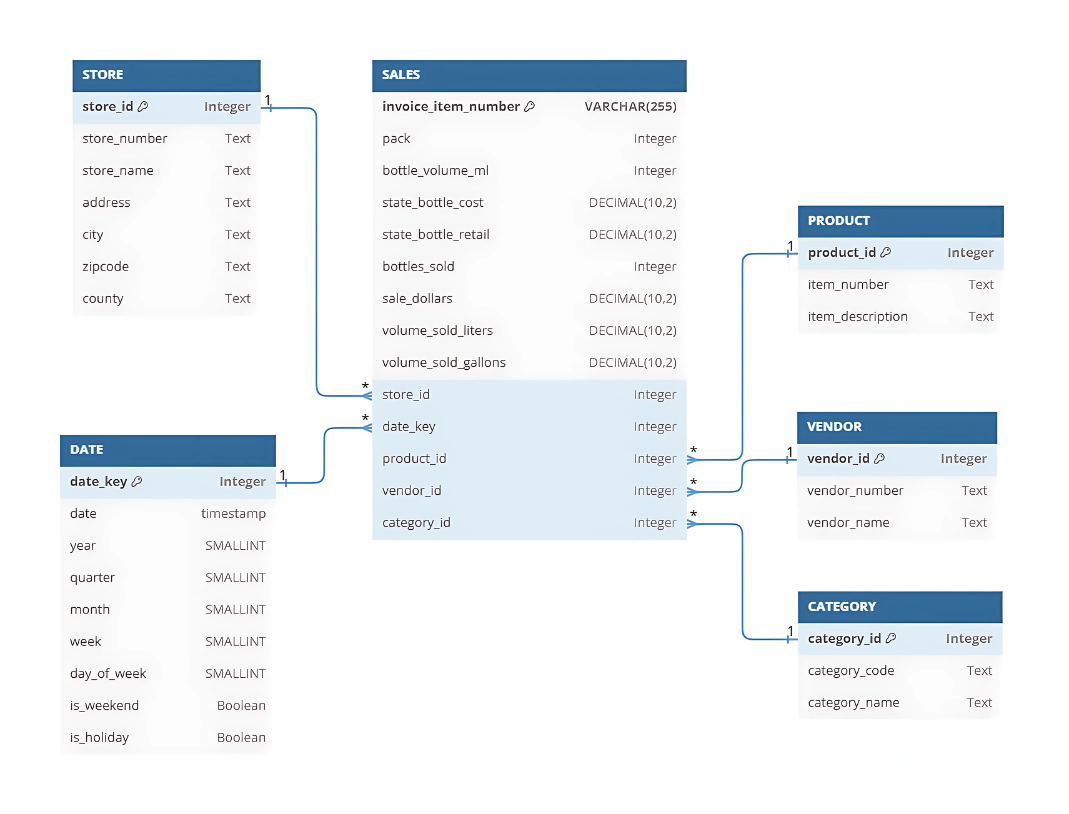

In [4]:
display(Image(filename="Graphs/schema.png"))

### Exploratory Data Analysis (EDA):
Using SQL, the team explored key questions about product sales, store performance, vendor dominance, and consumer preferences.

#### Analytical questions we aim to answer with this data:
#### Insight 1: Product Performance
- **Top Performing Products & Categories**: Identifying top sellers helps optimize stock, pricing, and promotional strategies, driving inventory management and revenue growth.
- **Negative Sales by Product and Category**: Recognizing products or categories with negative sales allows corrective actions like pricing adjustments, renegotiating with suppliers, or discontinuing unprofitable items.

#### Insight 2: Seasonal Trends
- **Sales on Holidays vs. Non-Holidays & Weekends vs. Weekdays**: Understanding sales patterns across different days and holidays helps optimize staffing, marketing, and inventory strategies during peak times.
- **Best Performing Products During Holidays**: Identifying holiday top-sellers ensures early stock-ups and tailored promotions to capitalize on peak demand.
- **Best Performing Holidays**: Focusing on high-performing holidays allows for more effective marketing and inventory planning to maximize profits.
- **Monthly Sales Performance**: Tracking seasonal trends enables better planning for marketing, promotions, and inventory adjustments based on fluctuating demand.

#### Insight 3: Regional Performance
- **Sales and Profit by County**: County-level data helps identify strong-performing regions and areas needing attention, guiding resource allocation and expansion strategies.
- **Sales Performance by City**: City-specific sales insights reveal regional trends, helping target local marketing and expansion opportunities.
- **Top-Performing Stores by Sales and Profit**: Analyzing store performance identifies successful locations and underperforming ones, guiding operational improvements.
- **Identifying Underserved Markets**: Pinpointing cities with low sales but high potential directs expansion efforts into areas with untapped demand, fostering growth.
___

# Building the Database using Dimensional Modeling

#### Checking if`ipython-sql` and `psycopg2` packages are installed in the Python environment and displaying their versions.

In [5]:
!pip freeze | grep -E 'ipython-sql|psycopg2'

psycopg2==2.9.9
types-psycopg2==2.9


#### Verifying that psql is installed and providing its version.

In [6]:
! psql --version

psql (PostgreSQL) 16.6 (Ubuntu 16.6-0ubuntu0.24.04.1)


#### Loading SQL extension

In [7]:
%reload_ext sql

/home/ubuntu/.python3-venv/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### Dropping the Final_Project database if it exists

In [8]:
!dropdb -U student 5_Final_Project

#### Creating Final_Project database

In [9]:
!createdb -U student 5_Final_Project

#### Establishing a connection to the PostgreSQL database using the %sql magic command

In [10]:
%sql postgresql://student@/5_Final_Project

Connecting to 'postgresql://student@/5_Final_Project'

#### Checking current directory 

In [11]:
!pwd

/home/ubuntu


In [12]:
from IPython.display import Image, display

#### Counting the total number of lines (rows) in the Iowa_Liquor_Sales.csv file, including the header

In [13]:
!tail -n +1 Iowa_Liquor_Sales.csv | wc -l

2586265


#### Counting rows with missing fields (empty commas)

In [14]:
! grep -c ",," Iowa_Liquor_Sales.csv

2586264


#### Dropping `Sales` table (if it exists) before creating a new `Sales` table 

In [15]:
%%sql
DROP TABLE IF EXISTS sales;

CREATE TABLE
  sales (
    Invoice_Item_Number VARCHAR(255) NOT NULL, -- Unique identifier for each sales transaction
    DATE TIMESTAMP, -- Date and time of the transaction
    Store_Number VARCHAR(255), -- Unique number assigned to the store
    Store_Name VARCHAR(255), -- Name of the store
    Address VARCHAR(255), -- Address of the store
    City VARCHAR(255), -- City where the store is located
    Zip_Code VARCHAR(255), -- Zip code of the store's location
    Store_Location VARCHAR(255), -- Geographical location of the store (e.g., latitude/longitude)
    County_Number VARCHAR(255), -- Iowa county number for the store
    County VARCHAR(255), -- Name of the county where the store is located
    Category VARCHAR(255), -- Code representing the liquor category
    Category_Name VARCHAR(255), -- Name of the liquor category (e.g., Vodka, Whiskey)
    Vendor_Number VARCHAR(255), -- Unique identifier for the vendor
    Vendor_Name VARCHAR(255), -- Name of the vendor supplying the liquor
    Item_Number VARCHAR(255), -- Unique identifier for the individual liquor product
    Item_Description VARCHAR(255), -- Description of the liquor product (e.g., brand name)
    Pack INTEGER, -- Number of bottles in a pack
    Bottle_Volume_ml INTEGER, -- Volume of each bottle in milliliters
    State_Bottle_Cost DECIMAL(10, 2), -- Cost of a bottle to the state
    State_Bottle_Retail DECIMAL(10, 2), -- Retail price of a bottle
    Bottles_Sold INTEGER, -- Number of bottles sold in the transaction
    Sale_Dollars DECIMAL(10, 2), -- Total sales revenue from the transaction
    Volume_Sold_Liters DECIMAL(10, 2), -- Total volume sold in liters
    Volume_Sold_Gallons DECIMAL(10, 2) -- Total volume sold in gallons
  );

Running query in 'postgresql://student@/5_Final_Project'

++
||
++
++

#### Copying data from the CSV file `Iowa_Liquor_Sales.csv` into the `sales` table, treating the first row as the column headers.

In [16]:
%%sql 
COPY sales
FROM
  '/home/ubuntu/Iowa_Liquor_Sales.csv' CSV HEADER;

Running query in 'postgresql://student@/5_Final_Project'

2586264 rows affected.

++
||
++
++

#### Validating data loaded into `Sales`

In [17]:
%%sql
SELECT
  * -- Selects all columns from the Sales table
FROM
  Sales -- The Sales table contains transaction data
LIMIT
  10;

-- Limits the result to the first 10 rows

Running query in 'postgresql://student@/5_Final_Project'

10 rows affected.

invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
INV-63874400022,2023-11-02 00:00:00,5591,CASEY'S GENERAL STORE #1682 / OSKALOOSA,1310 A AVE WEST,OSKALOOSA,52577,POINT (-92.659614967 41.295859982),None,MAHASKA,1031100,AMERICAN VODKAS,434,LUXCO INC,36304,HAWKEYE VODKA,24,375,2.00,3.00,24,72.00,9.00,2.37
INV-63886100065,2023-11-02 00:00:00,3769,WAL-MART 0753 / CEDAR FALLS,525 BRANDILYNN BLVD,CEDAR FALLS,50613,POINT (-92.440126032 42.48685198),None,BLACK HAWK,1022100,MIXTO TEQUILA,395,PROXIMO,89196,JOSE CUERVO ESPECIAL REPOSADO,12,750,12.00,18.00,12,216.00,9.00,2.37
INV-63887400017,2023-11-02 00:00:00,4509,AJ'S LIQUOR II,2515 CHAMBERLAIN,AMES,50010,POINT (-93.650866967 42.021632005),None,STORY,1031100,AMERICAN VODKAS,434,LUXCO INC,36308,HAWKEYE VODKA,6,1750,7.50,11.25,18,202.50,31.50,8.32
INV-63891400103,2023-11-02 00:00:00,2588,HY-VEE FOOD AND DRUG #6 / CEDAR RAPIDS,4035 MT VERNON RD SE,CEDAR RAPIDS,52403,POINT (-91.60975712 41.975159548),None,LINN,1081200,CREAM LIQUEURS,205,E & J GALLO WINERY,73051,RUMCHATA MINI,12,50,8.87,13.31,1,13.31,0.05,0.01
INV-63906600030,2023-11-02 00:00:00,2587,HY-VEE FOOD STORE / JOHNSTON,5750 MERLE HAY ROAD,JOHNSTON,50131,POINT (-93.699442024 41.665040991),None,POLK,1031100,AMERICAN VODKAS,380,PHILLIPS BEVERAGE,37665,ROW VODKA,6,1750,12.22,18.33,6,109.98,10.50,2.77
INV-63893000056,2023-11-02 00:00:00,2621,HY-VEE FOOD STORE #3 / SIOUX CITY,3301 GORDON DR,SIOUX CITY,51105,POINT (-96.362866022 42.488984001),None,WOODBURY,1062400,SPICED RUM,395,PROXIMO,46504,KRAKEN BLACK SPICED RUM,12,750,11.00,16.50,6,99.00,4.50,1.18
INV-63870500028,2023-11-02 00:00:00,5728,BEER THIRTY DENISON,923 4TH AVENUE SOUTH,DENISON,51442,POINT (-95.360099969 42.012058991),None,CRAWFORD,1082100,IMPORTED CORDIALS & LIQUEURS,421,SAZERAC COMPANY INC,64816,ROMANA BLACK SAMBUCA,12,750,14.00,21.00,3,63.00,2.25,0.59
INV-63892300016,2023-11-02 00:00:00,5102,WILKIE LIQUORS,724 1ST STREET NE,MOUNT VERNON,52314,POINT (-91.410777025 41.918154015),None,LINN,1701100,TEMPORARY & SPECIALTY PACKAGES,065,JIM BEAM BRANDS,16580,BAKERS 7YR,6,750,30.00,45.00,1,45.00,0.75,0.19
INV-63901200060,2023-11-02 00:00:00,6144,NORTHSIDE LIQUOR AND GROCERY / MASON CITY,1303 N FEDERAL,MASON CITY,50401,POINT (-93.200731023 43.163723016),None,CERRO GORDO,1081200,CREAM LIQUEURS,421,SAZERAC COMPANY INC,80023,BUFFALO TRACE BOURBON CREAM,12,750,11.00,16.50,6,99.00,4.50,1.18
INV-63900700009,2023-11-02 00:00:00,6015,CASEY'S GENERAL STORE #19 / MASON CITY,813 N FEDERAL AVE,MASON CITY,50401,POINT (-93.200509992 43.159683986),None,CERRO GORDO,1031100,AMERICAN VODKAS,260,DIAGEO AMERICAS,37994,SMIRNOFF 80PRF,24,375,4.99,7.49,24,179.76,9.00,2.37


### Populating Demensions Tables; Updating the Fact Sales Table 

#### 1. `Store` Table

In [18]:
%%sql
DROP TABLE IF EXISTS Store;

-- Deletes the Store table if it already exists to avoid conflicts when recreating it
CREATE TABLE
  Store (
    store_id SERIAL PRIMARY KEY, -- Unique identifier for each store, auto-incremented
    store_number TEXT, -- Unique number assigned to the store (external reference)
    store_name TEXT, -- Name of the store
    address TEXT, -- Physical address of the store
    city TEXT, -- City where the store is located
    zipcode TEXT, -- Zip code of the store's location
    county TEXT -- County where the store is located
  );

Running query in 'postgresql://student@/5_Final_Project'

++
||
++
++

In [19]:
%%sql
INSERT INTO
  Store ( -- Specifies the target table for the data insertion
    store_number, -- Store's unique number
    store_name, -- Store's name
    address, -- Store's physical address
    city, -- City where the store is located
    zipcode, -- Store's zip code
    county -- Store's county
  )
SELECT DISTINCT
  Store_Number AS store_number, -- Ensures each store number is inserted only once
  Store_Name AS store_name, -- Maps the store name from the sales table
  Address AS address, -- Maps the store address from the sales table
  City AS city, -- Maps the store city from the sales table
  Zip_Code AS zipcode, -- Maps the zip code from the sales table
  -- Store_Location AS store_location, -- Commented out as it's not used in the target table
  -- County_Number AS county_number, -- Commented out as it's not used in the target table
  County AS county -- Maps the store's county from the sales table
FROM
  sales -- Source table containing sales transaction data
WHERE
  Store_Number IS NOT NULL;

-- Excludes rows with null store numbers to avoid incomplete records

Running query in 'postgresql://student@/5_Final_Project'

2196 rows affected.

++
||
++
++

#### Checking if the `Sales` table loaded well

In [20]:
%%sql
SELECT
  * -- Selects all columns from the Store table
FROM
  Store -- The table containing store-related information (e.g., store name, address, etc.)
LIMIT
  10;

-- Limits the output to the first 10 rows for preview

Running query in 'postgresql://student@/5_Final_Project'

10 rows affected.

store_id,store_number,store_name,address,city,zipcode,county
1,010003,TOP SHELF LIQUOR / IOWA CITY,412 HIGHWAY 1,IOWA CITY,52246,JOHNSON
2,010004,JACK & JILL STORE / WEST BRANCH,115 EAST MAIN STREET,WEST BRANCH,52358,CEDAR
3,010005,THE CROWN LIQUOR / IOWA CITY,324 EAST WASHINGTON STREET,IOWA CITY,52240,JOHNSON
4,010016,KWIK STAR #1180 / PERRY,511 1ST AVE,PERRY,50220,DALLAS
5,010017,KWIK STAR #1119 / EMMETSBURG,1303 MAIN ST,EMMETSBURG,50536,PALO ALTO
6,010018,KWIK STAR #710 / TOLEDO,1002 SOUTH COUNTY RD,TOLEDO,52342,TAMA
7,010019,OELWEIN MART / OELWEIN,801 EAST CHARLES STREET,OELWEIN,50662,FAYETTE
8,010020,LOCAL LIQUOR / PANORA,603 EAST MAIN STREET,PANORA,50216,GUTHRIE
9,010021,WORLD CLASS LIQUOR AND TOBACCO / BONDURANT,96 PAINE CIRCLE SE 1 & 2,BONDURANT,50035,POLK
10,010023,HY-VEE FAST AND FRESH #3 (7592) / WEST DES MOINES,300 GRAND AVENUE,WEST DES MOINES,50265,POLK


#### Enforcing foreign key on store_id in the `Sales` table

In [21]:
%%sql
-- Add a new column 'store_id' to the 'sales' table to establish a foreign key relationship
ALTER TABLE sales
ADD COLUMN store_id INTEGER;

-- Add a foreign key constraint to ensure 'store_id' in 'sales' references 'store_id' in the 'store' table
ALTER TABLE sales ADD CONSTRAINT fk_store FOREIGN KEY (store_id) REFERENCES store (store_id);

Running query in 'postgresql://student@/5_Final_Project'

++
||
++
++

In [22]:
%%sql
UPDATE sales -- Update the store_id column in the sales table by matching on store_number
SET
  store_id = store.store_id -- Assigns the store_id from the store table to the sales table
FROM
  store -- Specifies the store table as the source of the store_id
WHERE
  sales.store_number = store.store_number;

-- Matches sales records to stores based on the store_number

Running query in 'postgresql://student@/5_Final_Project'

2586264 rows affected.

++
||
++
++

#### 2. `Date` Table

In [23]:
%%sql
-- Drop the DATE table if it already exists to avoid conflicts
DROP TABLE IF EXISTS DATE;

-- Create the DATE table with attributes for time-based analysis
CREATE TABLE
  DATE (
    date_key INTEGER PRIMARY KEY, -- Unique key representing each date (e.g., as YYYYMMDD)
    DATE TIMESTAMP, -- The full timestamp for the date
    YEAR SMALLINT, -- The year (e.g., 2023)
    quarter SMALLINT, -- The quarter of the year (1-4)
    MONTH SMALLINT, -- The month (1-12)
    week SMALLINT, -- The week of the year (1-52)
    day_of_week SMALLINT, -- The day of the week (1 for Monday, 7 for Sunday)
    is_weekend BOOLEAN, -- Indicates whether the date falls on a weekend
    is_holiday BOOLEAN -- Indicates whether the date is a public holiday
  );

Running query in 'postgresql://student@/5_Final_Project'

++
||
++
++

In [24]:
%%sql
-- Insert unique date records into the DATE table based on the sales table
INSERT INTO
  DATE (
    date_key, -- Unique key generated from the UNIX timestamp (epoch)
    DATE, -- The full date timestamp
    YEAR, -- Extracted year from the date
    quarter, -- Extracted quarter from the date (1-4)
    MONTH, -- Extracted month from the date (1-12)
    week, -- Extracted week number from the year
    day_of_week, -- Extracted day of the week (0 for Sunday, 6 for Saturday)
    is_weekend, -- Boolean indicating whether the day is a weekend
    is_holiday -- Set to FALSE for now, can be updated later
  )
SELECT DISTINCT
  EXTRACT( -- Extracting the UNIX timestamp (epoch) from the date to create a unique date_key
    EPOCH
    FROM
      DATE
  ) AS date_key, -- UNIX timestamp as a unique date identifier
  DATE AS DATE, -- The actual date from the sales table
  EXTRACT( -- Extract the year from the date
    YEAR
    FROM
      DATE
  ) AS YEAR, -- Year component of the date
  EXTRACT( -- Extract the quarter from the date (1-4)
    QUARTER
    FROM
      DATE
  ) AS quarter, -- Quarter of the year
  EXTRACT( -- Extract the month from the date (1-12)
    MONTH
    FROM
      DATE
  ) AS MONTH, -- Month of the year
  EXTRACT( -- Extract the week number from the date (1-52)
    WEEK
    FROM
      DATE
  ) AS week, -- Week of the year
  EXTRACT( -- Extract the day of the week from the date (0-6, 0 is Sunday, 6 is Saturday)
    DOW
    FROM
      DATE
  ) AS day_of_week, -- Day of the week
  CASE -- Determine if the date is a weekend (0 or 6 corresponds to Sunday or Saturday)
    WHEN EXTRACT(
      DOW
      FROM
        DATE
    ) IN (0, 6) THEN TRUE -- True if it's Saturday or Sunday
    ELSE FALSE -- False for weekdays (Monday to Friday)
  END AS is_weekend, -- Boolean value indicating if the date falls on a weekend
  FALSE AS is_holiday -- Initially set all entries as non-holiday (can be updated later)
FROM
  sales -- Using the sales table as the source for dates
WHERE
  DATE IS NOT NULL;

-- Ensure that the DATE is not NULL in the sales table before inserting

Running query in 'postgresql://student@/5_Final_Project'

316 rows affected.

++
||
++
++

#### 2. Adding Holiday Name column to `Date` Table

In [25]:
%%sql
-- Add a new column 'holiday_name' to the DATE table to store holiday names
ALTER TABLE DATE
ADD COLUMN holiday_name VARCHAR(50);

-- Stores the name of the holiday (e.g., Christmas, New Year)

Running query in 'postgresql://student@/5_Final_Project'

++
||
++
++

### Identifying and assigning Holidays in Date Table

This SQL query is designed to update the `is_holiday` and `holiday_name` columns in the `DATE` table. The goal is to mark specific dates as holidays and assign their corresponding holiday names. The code checks for both **fixed-date holidays** (such as New Year's Day and Christmas) and **variable-date holidays** (such as Martin Luther King Jr. Day and Thanksgiving), which change each year based on specific weekday occurrences within a month. Data on holidays is extracted from https://www.commerce.gov/hr/employees/leave/holidays.

The query uses `CASE` statements to determine if a date is a holiday:
- For **fixed-date holidays**, it compares the month and day (e.g., January 1st for New Year's Day).
- For **variable-date holidays**, it calculates the weekday of the specific week in a month (e.g., the third Monday of January for Martin Luther King Jr. Day).
  
If a date is recognized as a holiday, the `is_holiday` column is set to `TRUE`, and the `holiday_name` column is populated with the appropriate holiday name. If not, the `is_holiday` is set to `FALSE` and `holiday_name` is set to `NULL`.

### Explanation of Code:

- **`CASE` Statement**: The query uses a `CASE` statement to evaluate whether each date is a holiday. If the conditions match, it sets the `is_holiday` column to `TRUE`. For each holiday, the `holiday_name` column is also populated with the respective holiday name.

- **Fixed-Date Holidays**: These holidays occur on the same date every year (e.g., Christmas on December 25th). The query checks for these by using the `EXTRACT` function to compare the month and day of the `DATE` column.

- **Variable-Date Holidays**: Some holidays change each year, like Labor Day (the first Monday of September). The query calculates the specific weekday occurrence of these holidays by truncating the date to the beginning of the month and adding intervals to find the correct date.

- **`holiday_name`**: For each recognized holiday, the `holiday_name` column is updated with a string representing the holiday (e.g., "New Year's Day", "Labor Day"). For non-holidays, the `holiday_name` is set to `NULL`.

This approach ensures that every date in the `DATE` table is accurately marked as a holiday or not, and it assigns the correct holiday name where applicable. This is particularly useful for analyzing holiday-specific trends and seasonal data.



In [26]:
%%sql
    
-- Update 'is_holiday' and 'holiday_name' columns in the DATE table
UPDATE DATE
SET
  is_holiday = CASE
    -- Fixed-Date Holidays
    WHEN EXTRACT(MONTH FROM DATE) = 1 AND EXTRACT(DAY FROM DATE) = 1 THEN TRUE -- New Year's Day
    WHEN EXTRACT(MONTH FROM DATE) = 6 AND EXTRACT(DAY FROM DATE) = 19 THEN TRUE -- Juneteenth
    WHEN EXTRACT(MONTH FROM DATE) = 7 AND EXTRACT(DAY FROM DATE) = 4 THEN TRUE -- Independence Day
    WHEN EXTRACT(MONTH FROM DATE) = 11 AND EXTRACT(DAY FROM DATE) = 11 THEN TRUE -- Veterans' Day
    WHEN EXTRACT(MONTH FROM DATE) = 12 AND EXTRACT(DAY FROM DATE) = 25 THEN TRUE -- Christmas Day
    -- Variable-Date Holidays
    WHEN DATE = (DATE_TRUNC('month', DATE) + INTERVAL '14 days' + INTERVAL '1 day' * (7 - EXTRACT(DOW FROM (DATE_TRUNC('month', DATE) + INTERVAL '14 days')))) AND EXTRACT(MONTH FROM DATE) = 1 THEN TRUE -- Martin Luther King Jr. Day
    WHEN DATE = (DATE_TRUNC('month', DATE) + INTERVAL '14 days' + INTERVAL '1 day' * (7 - EXTRACT(DOW FROM (DATE_TRUNC('month', DATE) + INTERVAL '14 days')))) AND EXTRACT(MONTH FROM DATE) = 2 THEN TRUE -- Presidents' Day
    WHEN DATE = (DATE_TRUNC('month', DATE) + INTERVAL '1 month' - INTERVAL '1 day' - INTERVAL '1 day' * EXTRACT(DOW FROM (DATE_TRUNC('month', DATE) + INTERVAL '1 month' - INTERVAL '1 day'))) AND EXTRACT(MONTH FROM DATE) = 5 THEN TRUE -- Memorial Day
    WHEN DATE = (DATE_TRUNC('month', DATE) + INTERVAL '7 days' + INTERVAL '1 day' * (7 - EXTRACT(DOW FROM (DATE_TRUNC('month', DATE) + INTERVAL '7 days')))) AND EXTRACT(MONTH FROM DATE) = 9 THEN TRUE -- Labor Day
    WHEN DATE = (DATE_TRUNC('month', DATE) + INTERVAL '7 days' + INTERVAL '1 day' * (7 - EXTRACT(DOW FROM (DATE_TRUNC('month', DATE) + INTERVAL '7 days')))) AND EXTRACT(MONTH FROM DATE) = 10 THEN TRUE -- Columbus Day
    WHEN DATE = (DATE_TRUNC('month', DATE) + INTERVAL '21 days' + INTERVAL '1 day' * (4 - EXTRACT(DOW FROM (DATE_TRUNC('month', DATE) + INTERVAL '21 days')))) AND EXTRACT(MONTH FROM DATE) = 11 THEN TRUE -- Thanksgiving Day
    ELSE FALSE -- Non-holidays
  END,
  holiday_name = CASE
    -- Fixed-Date Holidays
    WHEN EXTRACT(MONTH FROM DATE) = 1 AND EXTRACT(DAY FROM DATE) = 1 THEN 'New Year''s Day'
    WHEN EXTRACT(MONTH FROM DATE) = 6 AND EXTRACT(DAY FROM DATE) = 19 THEN 'Juneteenth'
    WHEN EXTRACT(MONTH FROM DATE) = 7 AND EXTRACT(DAY FROM DATE) = 4 THEN 'Independence Day'
    WHEN EXTRACT(MONTH FROM DATE) = 11 AND EXTRACT(DAY FROM DATE) = 11 THEN 'Veterans'' Day'
    WHEN EXTRACT(MONTH FROM DATE) = 12 AND EXTRACT(DAY FROM DATE) = 25 THEN 'Christmas Day'
    -- Variable-Date Holidays
    WHEN DATE = (DATE_TRUNC('month', DATE) + INTERVAL '14 days' + INTERVAL '1 day' * (7 - EXTRACT(DOW FROM (DATE_TRUNC('month', DATE) + INTERVAL '14 days')))) AND EXTRACT(MONTH FROM DATE) = 1 THEN 'Martin Luther King Jr. Day'
    WHEN DATE = (DATE_TRUNC('month', DATE) + INTERVAL '14 days' + INTERVAL '1 day' * (7 - EXTRACT(DOW FROM (DATE_TRUNC('month', DATE) + INTERVAL '14 days')))) AND EXTRACT(MONTH FROM DATE) = 2 THEN 'Presidents'' Day'
    WHEN DATE = (DATE_TRUNC('month', DATE) + INTERVAL '1 month' - INTERVAL '1 day' - INTERVAL '1 day' * EXTRACT(DOW FROM (DATE_TRUNC('month', DATE) + INTERVAL '1 month' - INTERVAL '1 day'))) AND EXTRACT(MONTH FROM DATE) = 5 THEN 'Memorial Day'
    WHEN DATE = (DATE_TRUNC('month', DATE) + INTERVAL '7 days' + INTERVAL '1 day' * (7 - EXTRACT(DOW FROM (DATE_TRUNC('month', DATE) + INTERVAL '7 days')))) AND EXTRACT(MONTH FROM DATE) = 9 THEN 'Labor Day'
    WHEN DATE = (DATE_TRUNC('month', DATE) + INTERVAL '7 days' + INTERVAL '1 day' * (7 - EXTRACT(DOW FROM (DATE_TRUNC('month', DATE) + INTERVAL '7 days')))) AND EXTRACT(MONTH FROM DATE) = 10 THEN 'Columbus Day'
    WHEN DATE = (DATE_TRUNC('month', DATE) + INTERVAL '21 days' + INTERVAL '1 day' * (4 - EXTRACT(DOW FROM (DATE_TRUNC('month', DATE) + INTERVAL '21 days')))) AND EXTRACT(MONTH FROM DATE) = 11 THEN 'Thanksgiving Day'
    ELSE NULL -- Non-holidays
  END;


Running query in 'postgresql://student@/5_Final_Project'

316 rows affected.

++
||
++
++

In [27]:
%%sql
-- Add a new column 'date_key' to the 'sales' table to link each sale to a specific date in the 'DATE' table
ALTER TABLE sales
ADD COLUMN date_key INTEGER;

-- 'date_key' will store the unique date identifier for each sale
-- Add a foreign key constraint to 'date_key' in the 'sales' table, linking it to the 'date_key' in the 'DATE' table
ALTER TABLE sales ADD CONSTRAINT fk_date FOREIGN KEY (date_key) REFERENCES DATE (date_key);

-- Ensures referential integrity between 'sales' and 'DATE' tables

Running query in 'postgresql://student@/5_Final_Project'

++
||
++
++

In [28]:
%%sql
-- Update the 'date_key' in the 'sales' table by matching the 'date' with the 'DATE' table
UPDATE sales
SET
  date_key = DATE.date_key -- Set 'date_key' in 'sales' to the corresponding 'date_key' from 'DATE'
FROM
  DATE -- Join the 'DATE' table to use its 'date_key' value
WHERE
  sales.date = DATE.date;

-- Match the 'sales.date' with 'DATE.date' to ensure correct date association

Running query in 'postgresql://student@/5_Final_Project'

2586264 rows affected.

++
||
++
++

#### Checking if the `Date` table loaded well

In [29]:
%%sql
-- Select all columns from the 'DATE' table
SELECT
  * -- Select all columns
FROM
  DATE -- The table containing date-related information
LIMIT
  10;

-- Limit the result to the first 10 rows for preview

Running query in 'postgresql://student@/5_Final_Project'

10 rows affected.

date_key,date,year,quarter,month,week,day_of_week,is_weekend,is_holiday,holiday_name
1711584000,2024-03-28 00:00:00,2024,1,3,13,4,False,False,None
1728000000,2024-10-04 00:00:00,2024,4,10,40,5,False,False,None
1712534400,2024-04-08 00:00:00,2024,2,4,15,1,False,False,None
1716422400,2024-05-23 00:00:00,2024,2,5,21,4,False,False,None
1725408000,2024-09-04 00:00:00,2024,3,9,36,3,False,False,None
1719964800,2024-07-03 00:00:00,2024,3,7,27,3,False,False,None
1722211200,2024-07-29 00:00:00,2024,3,7,31,1,False,False,None
1706832000,2024-02-02 00:00:00,2024,1,2,5,5,False,False,None
1703894400,2023-12-30 00:00:00,2023,4,12,52,6,True,False,None
1728345600,2024-10-08 00:00:00,2024,4,10,41,2,False,False,None


##### Changing the datatype from "Datetime" to "Date" since the times recorded are just the same, which is 00:00

In [30]:
%%sql
-- Alter the 'Date' table to change the data type of the 'date' column
ALTER TABLE Date
ALTER COLUMN date TYPE DATE -- Change the 'date' column's type to 'DATE'
USING date::DATE; -- Cast the existing values in 'date' to the 'DATE' type


Running query in 'postgresql://student@/5_Final_Project'

++
||
++
++

#### 3. `Product` Table

In [31]:
%%sql
-- Drop the 'Product' table if it already exists to avoid conflicts
DROP TABLE IF EXISTS Product;

-- Create the 'Product' table with necessary columns
CREATE TABLE
  Product (
    product_id SERIAL PRIMARY KEY, -- Auto-incrementing unique identifier for each product
    item_number TEXT, -- The unique identifier or code for the product (e.g., SKU)
    item_description TEXT -- A description of the product (e.g., name or details)
  );

Running query in 'postgresql://student@/5_Final_Project'

++
||
++
++

In [32]:
%%sql
-- Insert distinct product records into the 'Product' table based on the 'sales' table
INSERT INTO
  Product (item_number, item_description) -- Inserting into 'item_number' and 'item_description' columns of the 'Product' table
SELECT DISTINCT
  Item_Number AS item_number, -- Selecting distinct 'Item_Number' from 'sales' and renaming it to 'item_number'
  Item_Description AS item_description -- Selecting 'Item_Description' from 'sales' and renaming it to 'item_description'
FROM
  sales -- Using the 'sales' table as the source of the data
WHERE
  Item_Number IS NOT NULL;

-- Excluding records where 'Item_Number' is NULL

Running query in 'postgresql://student@/5_Final_Project'

5325 rows affected.

++
||
++
++

In [33]:
%%sql
-- Add a new column 'product_id' to the 'sales' table to link each sale to a product
ALTER TABLE sales
ADD COLUMN product_id INTEGER;

-- 'product_id' will store the reference to the 'Product' table
-- Add a foreign key constraint to 'product_id' in the 'sales' table, linking it to the 'product_id' in the 'Product' table
ALTER TABLE sales ADD CONSTRAINT fk_product FOREIGN KEY (product_id) REFERENCES product (product_id);

-- Ensures referential integrity between 'sales' and 'Product' tables

Running query in 'postgresql://student@/5_Final_Project'

++
||
++
++

In [34]:
%%sql
-- Update the 'product_id' in the 'sales' table by matching 'item_number' with the 'product' table
UPDATE sales
SET
  product_id = product.product_id -- Set 'product_id' in 'sales' to the corresponding 'product_id' from the 'product' table
FROM
  product -- Join the 'product' table to use its 'product_id'
WHERE
  sales.item_number = product.item_number;

-- Match 'sales.item_number' with 'product.item_number' to link the correct product

Running query in 'postgresql://student@/5_Final_Project'

2586264 rows affected.

++
||
++
++

In [35]:
%%sql
-- Select all columns from the 'Product' table
SELECT
  * -- Selects all columns in the 'Product' table
FROM
  Product -- Specifies the 'Product' table as the data source
LIMIT
  10;

-- Limits the result to the first 10 rows for preview

Running query in 'postgresql://student@/5_Final_Project'

10 rows affected.

product_id,item_number,item_description
1,953858,PAUL MASSON GRANDE AMBER COCONUT BRANDY
2,903089,SOOH GRAN CENTENARIO ANEJO
3,64136,DISARONNO AMARETTO
4,67595,PATRON XO CAFE
5,986730,SOOH OLE SMOKY BLACKBERRY MOONSHINE
6,16433,HIGH WEST BOTTLED IN BOND
7,968882,TEMPUS FUGIT CR�ME BANANE
8,73426,DAMSO MANDARIN SOJU
9,64489,CAROLANS SALTED CARAMEL
10,925051,HA REDWOOD EMPIRE EMERALD GIANT CASK STRENGTH RYE


#### 4. `Vendor` Table

In [36]:
%%sql
-- Drop the 'Vendor' table if it already exists to avoid conflicts when recreating it
DROP TABLE IF EXISTS Vendor;

-- Create the 'Vendor' table with the necessary columns
CREATE TABLE
  Vendor (
    vendor_id SERIAL PRIMARY KEY, -- Auto-incrementing unique identifier for each vendor
    vendor_number TEXT, -- Unique identifier or code for the vendor
    vendor_name TEXT -- Name of the vendor (e.g., company name)
  );

Running query in 'postgresql://student@/5_Final_Project'

++
||
++
++

In [37]:
%%sql
-- Insert distinct vendor records into the 'Vendor' table based on the 'sales' table
INSERT INTO
  Vendor (vendor_number, vendor_name) -- Insert into 'vendor_number' and 'vendor_name' columns of the 'Vendor' table
SELECT DISTINCT
  Vendor_Number AS vendor_number, -- Select distinct 'Vendor_Number' from 'sales' and alias as 'vendor_number'
  Vendor_Name AS vendor_name -- Select 'Vendor_Name' from 'sales' and alias as 'vendor_name'
FROM
  sales -- Using the 'sales' table as the source of the data
WHERE
  Vendor_Number IS NOT NULL;

-- Exclude records where 'Vendor_Number' is NULL

Running query in 'postgresql://student@/5_Final_Project'

243 rows affected.

++
||
++
++

In [38]:
%%sql
-- Add a new column 'vendor_id' to the 'sales' table to link each sale to a specific vendor
ALTER TABLE sales
ADD COLUMN vendor_id INTEGER;

-- 'vendor_id' will store the reference to the 'Vendor' table
-- Add a foreign key constraint to 'vendor_id' in the 'sales' table, linking it to the 'vendor_id' in the 'Vendor' table
ALTER TABLE sales ADD CONSTRAINT fk_vendor FOREIGN KEY (vendor_id) REFERENCES vendor (vendor_id);

-- Ensures referential integrity between 'sales' and 'Vendor' tables

Running query in 'postgresql://student@/5_Final_Project'

++
||
++
++

In [39]:
%%sql
-- Update the 'vendor_id' in the 'sales' table by matching 'vendor_number' with the 'vendor' table
UPDATE sales
SET
  vendor_id = vendor.vendor_id -- Set 'vendor_id' in 'sales' to the corresponding 'vendor_id' from the 'vendor' table
FROM
  vendor -- Join the 'vendor' table to access the 'vendor_id'
WHERE
  sales.vendor_number = vendor.vendor_number;

-- Match 'sales.vendor_number' with 'vendor.vendor_number' to link the

Running query in 'postgresql://student@/5_Final_Project'

2586264 rows affected.

++
||
++
++

In [40]:
%%sql
-- Select all columns from the 'Vendor' table
SELECT
  * -- Selects all columns from the 'Vendor' table
FROM
  Vendor -- Specifies the 'Vendor' table as the data source
LIMIT
  10;

-- Limits the result to the first 10 rows for previewing

Running query in 'postgresql://student@/5_Final_Project'

10 rows affected.

vendor_id,vendor_number,vendor_name
1,454,SALOON SPIRITS LLC
2,065,JIM BEAM BRANDS
3,421,SAZERAC COMPANY INC
4,963,"HUBER ORCHARDS, INC."
5,900,ATOMIC BRANDS INC
6,826,KNEE-HIGH DISTILLING CO. LLC
7,273,HAWAII SEA SPIRITS LLC
8,934,LONG ISLAND SPIRITS INC.
9,810,WRS CO. LLC / WRS IMPORTS
10,479,VIN DIVINO LTD / GONZALEZ BYASS USA


#### 5. `Category` Table

In [41]:
%%sql
-- Drop the 'Category' table if it already exists to avoid conflicts
DROP TABLE IF EXISTS Category;

-- Create the 'Category' table with the necessary columns
CREATE TABLE
  Category (
    category_id SERIAL PRIMARY KEY, -- Auto-incrementing unique identifier for each category
    category_code TEXT, -- A unique code for the category
    category_name TEXT -- Name of the category 
  );

Running query in 'postgresql://student@/5_Final_Project'

++
||
++
++

In [42]:
%%sql
-- Insert distinct category records into the 'Category' table based on the 'sales' table
INSERT INTO
  Category (category_code, category_name) -- Inserting into 'category_code' and 'category_name' columns of the 'Category' table
SELECT DISTINCT
  Category AS category_code, -- Select distinct 'Category' from 'sales' and alias it as 'category_code'
  Category_Name AS category_name -- Select 'Category_Name' from 'sales' and alias it as 'category_name'
FROM
  sales -- Using the 'sales' table as the source of the data
WHERE
  Category IS NOT NULL;

-- Exclude records where 'Category' is NULL

Running query in 'postgresql://student@/5_Final_Project'

48 rows affected.

++
||
++
++

In [43]:
%%sql
-- Add a new column 'category_id' to the 'sales' table to link each sale to a specific category
ALTER TABLE sales
ADD COLUMN category_id INTEGER;

-- 'category_id' will store the reference to the 'Category' table
-- Add a foreign key constraint to 'category_id' in the 'sales' table, linking it to the 'category_id' in the 'Category' table
ALTER TABLE sales ADD CONSTRAINT fk_category FOREIGN KEY (category_id) REFERENCES category (category_id);

-- Ensures referential integrity between 'sales' and 'Category' tables

Running query in 'postgresql://student@/5_Final_Project'

++
||
++
++

In [44]:
%%sql
-- Update the 'category_id' in the 'sales' table by matching 'category_code' with the 'category' table
UPDATE sales
SET
  category_id = category.category_id -- Set 'category_id' in 'sales' to the corresponding 'category_id' from the 'category' table
FROM
  category -- Join the 'category' table to access the 'category_id'
WHERE
  sales.category = category.category_code;

-- Match 'sales.category' with 'category.category_code' to link the correct category

Running query in 'postgresql://student@/5_Final_Project'

2586264 rows affected.

++
||
++
++

#### Checking if the `Category` Table loaded well

In [45]:
%%sql
-- Select all columns from the 'Category' table
SELECT
  * -- Selects all columns from the 'Category' table
FROM
  Category -- Specifies the 'Category' table as the data source
LIMIT
  10;

-- Limits the result to the first 10 rows for previewing

Running query in 'postgresql://student@/5_Final_Project'

10 rows affected.

category_id,category_code,category_name
1,1091100,AMERICAN DISTILLED SPIRITS SPECIALTY
2,1011300,SINGLE BARREL BOURBON WHISKIES
3,1082000,IMPORTED CORDIALS & LIQUEURS
4,1022300,MEZCAL
5,1022200,100% AGAVE TEQUILA
6,1012400,IRISH WHISKIES
7,1031200,AMERICAN FLAVORED VODKA
8,1062400,SPICED RUM
9,1081500,TRIPLE SEC
10,1081200,CREAM LIQUEURS


#### Dropping attributes that are not needed in the `Sales` table anymore

In [46]:
%%sql
-- Drop multiple unnecessary columns from the 'sales' table
ALTER TABLE sales
DROP COLUMN category, -- Removes the 'category' column
DROP COLUMN category_name, -- Removes the 'category_name' column
DROP COLUMN vendor_number, -- Removes the 'vendor_number' column
DROP COLUMN vendor_name, -- Removes the 'vendor_name' column
DROP COLUMN store_number, -- Removes the 'store_number' column
DROP COLUMN store_name, -- Removes the 'store_name' column
DROP COLUMN address, -- Removes the 'address' column
DROP COLUMN city, -- Removes the 'city' column
DROP COLUMN zip_code, -- Removes the 'zip_code' column
DROP COLUMN store_location, -- Removes the 'store_location' column
DROP COLUMN county_number, -- Removes the 'county_number' column
DROP COLUMN county, -- Removes the 'county' column
DROP COLUMN item_number, -- Removes the 'item_number' column
DROP COLUMN item_description, -- Removes the 'item_description' column
DROP COLUMN DATE;

-- Removes the 'DATE' column

Running query in 'postgresql://student@/5_Final_Project'

++
||
++
++

### Foreign Keys Verification

In [47]:
%%sql
-- Select foreign key constraints to verify key relationships between tables
SELECT
    conname AS constraint_name, -- Name of the foreign key constraint
    conrelid::regclass AS table_name, -- Name of the table with the foreign key
    a.attname AS column_name, -- Name of the column that holds the foreign key
    confrelid::regclass AS referenced_table, -- Name of the referenced table
    af.attname AS referenced_column -- Name of the referenced column in the foreign table
FROM
    pg_constraint AS c -- The pg_constraint table stores constraint information
    JOIN pg_attribute AS a ON a.attnum = c.conkey[1] AND a.attrelid = c.conrelid -- Join to get the column name from the table with the foreign key
    JOIN pg_attribute AS af ON af.attnum = c.confkey[1] AND af.attrelid = c.confrelid -- Join to get the referenced column from the referenced table
WHERE
    c.contype = 'f'; -- Filter to select only foreign key constraints


Running query in 'postgresql://student@/5_Final_Project'

5 rows affected.

constraint_name,table_name,column_name,referenced_table,referenced_column
fk_store,sales,store_id,store,store_id
fk_date,sales,date_key,date,date_key
fk_product,sales,product_id,product,product_id
fk_vendor,sales,vendor_id,vendor,vendor_id
fk_category,sales,category_id,category,category_id


# Exploratory Data Analysis

## Business Insight 1. Product Performance

- **Top Performing Products & Categories**  
  Analyzing the top-performing products and categories allows the business to identify high-demand items and optimize its stock, pricing, and promotional strategies. By understanding which products or categories are consistently performing well, the company can make informed decisions to ensure better inventory management and maximize revenue.

- **Negative Sales by Product and Category**  
  Identifying products or categories with negative sales highlights inefficiencies or pricing issues. This analysis helps the business understand where products are being sold at a loss, which can lead to corrective actions like adjusting pricing strategies, renegotiating with suppliers, or discontinuing unprofitable items.


### 1.1 Top Performing Products

In [48]:
%%sql
-- Select the category and product information
SELECT
  p.item_description AS "Product Name", -- Name of the product
  c.category_name AS "Category", -- Category of the product
  SUM(s.bottles_sold) AS "Total Bottles Sold", -- Total number of bottles sold
  SUM(s.sale_dollars) AS "Total Sales", -- Total sales revenue
  ROUND(AVG(s.state_bottle_retail), 2) AS "Avg Retail Price" -- Average retail price per bottle, rounded to 2 decimal places
FROM
  sales s -- Sales data
  JOIN product p ON s.product_id = p.product_id -- Join to get product details
  JOIN category c ON s.category_id = c.category_id -- Join to get category details
GROUP BY
  c.category_name, -- Group by category name
  p.item_description -- Group by product name
ORDER BY
  "Total Sales" DESC -- Order results by total bottles sold in descending order
LIMIT
  5;

-- Restrict the output to the top 5 products

Running query in 'postgresql://student@/5_Final_Project'

5 rows affected.

Product Name,Category,Total Bottles Sold,Total Sales,Avg Retail Price
TITOS HANDMADE VODKA,AMERICAN VODKAS,1659897,30372109.13,17.05
BLACK VELVET,CANADIAN WHISKIES,1090976,11957465.26,11.41
FIREBALL CINNAMON WHISKEY,WHISKEY LIQUEUR,3199232,11088922.25,7.88
CROWN ROYAL,CANADIAN WHISKIES,375244,9791111.52,26.96
CROWN ROYAL REGAL APPLE,CANADIAN WHISKIES,424056,9576617.62,24.25


### 1.2 Top Performing Categories

In [49]:
%%sql
SELECT
  c.category_name AS "Category", -- Name of the category
  SUM(s.sale_dollars) AS "Total Sales", -- Total sales revenue for the category
  SUM(s.bottles_sold) AS "Total Bottles Sold", -- Total number of bottles sold for the category
  ROUND(AVG(s.state_bottle_retail), 2) AS "Avg Retail Price" -- Average retail price per bottle for the category
FROM
  sales s -- Sales data
  JOIN category c ON s.category_id = c.category_id -- Join to associate sales with categories
GROUP BY
  c.category_name -- Group results by category name
ORDER BY
  "Total Sales" DESC -- Order categories by total sales in descending order
LIMIT
  5;

-- Show only the top 5 categories

Running query in 'postgresql://student@/5_Final_Project'

5 rows affected.

Category,Total Sales,Total Bottles Sold,Avg Retail Price
AMERICAN VODKAS,66612097.84,6515719,10.67
CANADIAN WHISKIES,50751870.74,3033711,18.31
STRAIGHT BOURBON WHISKIES,39538170.24,1704523,26.89
100% AGAVE TEQUILA,34125513.21,1175371,35.18
WHISKEY LIQUEUR,26533374.19,4584549,16.76


### 1.3 Negative Sales by Product and Category

In [50]:
%%sql
SELECT
  c.category_name AS "Category", -- Name of the category
  p.item_description AS "Product Name", -- Name of the product
  SUM(s.sale_dollars) AS "Total Negative Sales", -- Total negative sales amount for the product
  COUNT(*) AS "Transaction Count" -- Number of transactions with negative sales for the product
FROM
  sales s -- Sales data
  JOIN product p ON s.product_id = p.product_id -- Join to associate sales with products
  JOIN category c ON s.category_id = c.category_id -- Join to associate sales with categories
WHERE
  s.sale_dollars < 0 -- Filter for negative sales values
GROUP BY
  c.category_name, -- Group results by category name
  p.item_description -- Group results by product name
ORDER BY
  "Total Negative Sales" ASC -- Order results by total negative sales in ascending order
LIMIT
  5;

-- Show only the top 5 results

Running query in 'postgresql://student@/5_Final_Project'

5 rows affected.

Category,Product Name,Total Negative Sales,Transaction Count
AMERICAN VODKAS,TITOS HANDMADE VODKA,-26073.23,130
CANADIAN WHISKIES,BLACK VELVET,-12939.27,96
CANADIAN WHISKIES,CROWN ROYAL REGAL APPLE,-12185.91,56
CANADIAN WHISKIES,CROWN ROYAL PEACH,-11441.70,26
WHISKEY LIQUEUR,FIREBALL CINNAMON WHISKEY,-9804.75,92


# Business Insight 2: Seasonal Trends

- **Best Performing Day of the Week**  
  Analyzing sales by day of the week helps the business understand fluctuations in demand, allowing for more effective planning. Certain days might perform better than others, and knowing this can help adjust marketing campaigns, promotions, and inventory levels in advance.

- **Sales Performance on Weekends vs. Weekdays**  
  Understanding the difference in sales between weekends and weekdays allows businesses to optimize staffing, marketing, and inventory for peak periods. Sales may spike on weekends, making these times ideal for targeted campaigns, while weekdays may require different strategies to boost sales.

- **Best Performing Products during Holidays**  
  Identifying top-performing products during peak holiday periods provides insights into seasonal consumer behavior, allowing businesses to stock up on these items ahead of time. It also presents opportunities for tailored promotions, helping the business capitalize on high-demand periods.

- **Best Performing Holidays**  
  Recognizing which holidays consistently generate the most sales helps prioritize marketing efforts and inventory planning. Focusing on high-performing holidays enables businesses to enhance their presence during these times and maximize profitability.  

> **Note:**  
> Due to the unavailability of December data, as data collection is not conducted during the holidays, we cannot draw insights for the holiday season in December. However, we can be certain that this is a well-performing period.


### 2.1 Best performing day of the week

In [51]:
%%sql
SELECT
  d.day_of_week AS "Day of Week", -- Numeric representation of the day of the week (0 = Sunday, ..., 6 = Saturday)
  CASE
    WHEN d.day_of_week = 0 THEN 'Sunday' -- Map numeric day 0 to 'Sunday'
    WHEN d.day_of_week = 1 THEN 'Monday' -- Map numeric day 1 to 'Monday'
    WHEN d.day_of_week = 2 THEN 'Tuesday' -- Map numeric day 2 to 'Tuesday'
    WHEN d.day_of_week = 3 THEN 'Wednesday' -- Map numeric day 3 to 'Wednesday'
    WHEN d.day_of_week = 4 THEN 'Thursday' -- Map numeric day 4 to 'Thursday'
    WHEN d.day_of_week = 5 THEN 'Friday' -- Map numeric day 5 to 'Friday'
    WHEN d.day_of_week = 6 THEN 'Saturday' -- Map numeric day 6 to 'Saturday'
    ELSE 'Unknown' -- Handle cases where day_of_week is outside the 0-6 range (shouldn't happen with clean data)
  END AS "Day Name", -- Converts numeric day to a human-readable day name
  SUM(s.sale_dollars) AS "Total Revenue", -- Aggregates total sales revenue for each day of the week
  SUM(s.bottles_sold) AS "Total Bottles Sold" -- Aggregates total number of bottles sold for each day of the week
FROM
  sales s -- Sales data table containing transaction details
  JOIN DATE d ON s.date_key = d.date_key -- Join with the DATE table using date_key to get day-related information
GROUP BY
  d.day_of_week -- Group by numeric day of the week to calculate totals for each day
ORDER BY
  "Total Revenue" DESC; -- Sort the results in descending order of total sales revenue for easier analysis


Running query in 'postgresql://student@/5_Final_Project'

7 rows affected.

Day of Week,Day Name,Total Revenue,Total Bottles Sold
3,Wednesday,91994535.23,6179139
4,Thursday,91293719.69,6072042
2,Tuesday,89810011.52,6413414
1,Monday,78934025.93,5574721
5,Friday,69046574.31,5096480
0,Sunday,16262355.06,1338437
6,Saturday,7258903.60,580023


### 2.2 Weekday vs Weekend performance

In [52]:
%%sql
SELECT
  d.is_weekend AS "Is Weekend", -- Flag for weekends (TRUE/FALSE)
  SUM(s.sale_dollars) AS "Total Sales", -- Total sales revenue
  SUM(s.bottles_sold) AS "Total Bottles Sold" -- Total number of bottles sold
FROM
  sales s
  JOIN DATE d ON s.date_key = d.date_key
GROUP BY
  d.is_weekend
ORDER BY
  "Total Sales" DESC; -- Order by total sales in descending order


Running query in 'postgresql://student@/5_Final_Project'

2 rows affected.

Is Weekend,Total Sales,Total Bottles Sold
False,421078866.68,29335796
True,23521258.66,1918460


### 2.3 Best performing products during holidays

In [53]:
%%sql
SELECT
  c.category_name AS "Category", -- Product category
  p.item_description AS "Product Name", -- Product name
  SUM(s.sale_dollars) AS "Total Sales", -- Total sales revenue
  SUM(s.bottles_sold) AS "Total Bottles Sold", -- Total bottles sold
  SUM(s.volume_sold_liters) AS "Total Volume Sold (Liters)" -- Total volume sold in liters
FROM
  sales s -- Sales data
  JOIN DATE d ON s.date_key = d.date_key -- Join to associate sales with corresponding dates
  JOIN product p ON s.product_id = p.product_id -- Join to associate sales with products
  JOIN category c ON s.category_id = c.category_id -- Join to associate sales with categories
WHERE
  d.is_holiday = TRUE -- Filter for holiday sales only
GROUP BY
  c.category_name, -- Group results by category name
  p.item_description -- Group results by product name
ORDER BY
  "Total Sales" DESC -- Order results by total sales in descending order
LIMIT
  5;

-- Limit the output to the top 5 products

Running query in 'postgresql://student@/5_Final_Project'

5 rows affected.

Category,Product Name,Total Sales,Total Bottles Sold,Total Volume Sold (Liters)
AMERICAN VODKAS,TITOS HANDMADE VODKA,315277.80,17642,16925.01
CANADIAN WHISKIES,CROWN ROYAL,154112.39,5317,4862.13
CANADIAN WHISKIES,BLACK VELVET,146804.27,13188,14246.21
TENNESSEE WHISKIES,JACK DANIELS OLD #7 BLACK LABEL,131595.13,4384,4374.50
WHISKEY LIQUEUR,FIREBALL CINNAMON WHISKEY,123617.50,36232,7284.39


### 2.4 Best performing holidays

In [54]:
%%sql
SELECT
  d.holiday_name AS "Holiday Name", -- Name of the holiday
  SUM(s.sale_dollars) AS "Total Sales", -- Total sales revenue for the holiday
  SUM(s.bottles_sold) AS "Total Bottles Sold" -- Total number of bottles sold on the holiday
FROM
  sales s
  JOIN DATE d ON s.date_key = d.date_key
WHERE
  d.is_holiday = TRUE -- Filter for holiday sales only
GROUP BY
  d.holiday_name -- Group results by holiday name
ORDER BY
  "Total Sales" DESC;

-- Order results by total sales in descending order

Running query in 'postgresql://student@/5_Final_Project'

9 rows affected.

Holiday Name,Total Sales,Total Bottles Sold
Juneteenth,1545394.78,102776
Independence Day,1245840.60,75638
Veterans' Day,935372.35,75188
Columbus Day,351506.81,27342
Labor Day,350864.82,29221
Martin Luther King Jr. Day,245262.84,17522
Presidents' Day,208569.78,14494
Thanksgiving Day,117814.47,8257
New Year's Day,6277.65,457


# Business Insight 3: Regional Performance

- **Sales Performance by County**  
  Sales and profit data by county helps the business identify which regions are performing well and which may need more attention. This insight is crucial for optimizing resource allocation, improving regional strategies, and even guiding future expansion into profitable areas.

- **Sales Performance by City**  
  City-level sales performance highlights regional trends and potential market opportunities. By understanding city-specific sales patterns, the business can adapt to local preferences and identify areas for expansion or focused marketing efforts.

- **Top-Performing Stores**  
  Analyzing store-level performance enables the company to recognize successful stores and extract best practices. Conversely, underperforming stores can be pinpointed for operational improvements or better resource allocation to boost overall sales and profitability.

- **Identifying Potentially Underserved Markets**  
  By identifying cities or regions with low sales but high potential, the business can target underserved markets for expansion. This analysis can help guide decisions on where to open new stores, aiming to capture untapped demand and grow the brand in regions with little competition.












### 3.1 Sales Performance by County

In [55]:
%%sql
SELECT
  st.county AS "County", -- County where the store is located
  SUM(s.sale_dollars) AS "Total Sales", -- Total sales revenue for the county
  SUM(s.bottles_sold) AS "Total Bottles Sold" -- Total number of bottles sold in the county
FROM
  sales s -- Sales data
  JOIN store st ON s.store_id = st.store_id -- Join to associate sales with store details
GROUP BY
  st.county -- Group results by county
ORDER BY
  "Total Sales" DESC -- Order results by total sales in descending order
LIMIT
  5;

-- Limit the output to the top 5 counties

Running query in 'postgresql://student@/5_Final_Project'

5 rows affected.

County,Total Sales,Total Bottles Sold
POLK,103418191.57,7134745
LINN,37086577.04,2723532
SCOTT,28457272.52,2185260
JOHNSON,24912006.76,1589582
BLACK HAWK,22836380.40,1740049


### 3.2 Sales Performance by City


In [56]:
%%sql
SELECT
  st.city AS "City", -- City where the store is located
  SUM(s.sale_dollars) AS "Total Sales", -- Total sales revenue for the city
  SUM(s.bottles_sold) AS "Total Bottles Sold", -- Total number of bottles sold in the city
  SUM(s.volume_sold_liters) AS "Total Volume Sold (Liters)" -- Total volume sold in liters in the city
FROM
  sales s -- Sales data
  JOIN store st ON s.store_id = st.store_id -- Join to associate sales with store details
GROUP BY
  st.city -- Group results by city
ORDER BY
  "Total Sales" DESC -- Order results by total sales in descending order
LIMIT
  5;

-- Limit the output to the top 5 cities

Running query in 'postgresql://student@/5_Final_Project'

5 rows affected.

City,Total Sales,Total Bottles Sold,Total Volume Sold (Liters)
DES MOINES,53298576.47,3861060,2530772.96
CEDAR RAPIDS,28103343.32,2044834,1457720.12
DAVENPORT,20838876.00,1675345,1097946.07
WEST DES MOINES,19695392.93,1093041,913961.11
COUNCIL BLUFFS,15046564.15,1121653,748939.22


### 3.3 Top-Performing Stores


In [57]:
%%sql
SELECT
  st.store_name AS "Store", -- Name of the store
  st.city AS "City", -- City where the store is located
  SUM(s.sale_dollars) AS "Total Sales", -- Total sales revenue for the store
  SUM(s.bottles_sold) AS "Total Bottles Sold", -- Total number of bottles sold by the store
  COUNT(DISTINCT s.invoice_item_number) AS "Distinct Transactions" -- Count of distinct transactions for the store
FROM
  sales s -- Sales data
  JOIN store st ON s.store_id = st.store_id -- Join to associate sales with store details
GROUP BY
  st.store_name, -- Group by store name
  st.city -- Group by city
ORDER BY
  "Total Sales" DESC -- Order results by total sales in descending order
LIMIT
  5;

-- Limit the output to the top 5 stores

Running query in 'postgresql://student@/5_Final_Project'

5 rows affected.

Store,City,Total Sales,Total Bottles Sold,Distinct Transactions
HY-VEE #3 / BDI / DES MOINES,DES MOINES,14555457.11,757864,19691
CENTRAL CITY 2,DES MOINES,13645852.79,702123,20786
ANOTHER ROUND / DEWITT,DEWITT,6562379.84,327011,11629
HY-VEE WINE AND SPIRITS #1 (1281) / IOWA CITY,IOWA CITY,5980446.97,378261,9521
BENZ DISTRIBUTING,CEDAR RAPIDS,5164441.01,266457,15678


### 3.4 Identifying potentially underserved markets

In [58]:
%%sql
SELECT
  st.city AS "City", -- City name
  COUNT(DISTINCT st.store_id) AS "Store Count", -- Total number of stores in the city
  SUM(sa.sale_dollars) AS "Total Sales", -- Total sales for the city
  ROUND(
    SUM(sa.sale_dollars) / COUNT(DISTINCT st.store_id),
    2
  ) AS "Avg Sales per Store", -- Average sales per store
  SUM(sa.volume_sold_liters) AS "Total Volume Sold (Liters)", -- Total volume sold in liters
  ROUND(
    SUM(sa.volume_sold_liters) / COUNT(DISTINCT st.store_id),
    2
  ) AS "Avg Volume per Store" -- Average volume per store
FROM
  STORE st -- Store table
  JOIN SALES sa ON st.store_id = sa.store_id -- Join sales data with store table
GROUP BY
  st.city -- Group by city
HAVING
  COUNT(DISTINCT st.store_id) < 5 -- Filter for cities with fewer than 5 stores
ORDER BY
  "Avg Sales per Store" DESC;

-- Rank by average sales per store in descending order

Running query in 'postgresql://student@/5_Final_Project'

360 rows affected.

City,Store Count,Total Sales,Avg Sales per Store,Total Volume Sold (Liters),Avg Volume per Store
MOUNT VERNON,3,3498921.36,1166307.12,210083.90,70027.97
ARNOLDS PARK,3,1909477.13,636492.38,96490.52,32163.51
LECLAIRE,1,264106.44,264106.44,8496.00,8496.00
HUMBOLDT,4,1055818.93,263954.73,61858.02,15464.51
FLOYD,1,262768.06,262768.06,14895.77,14895.77
MT PLEASANT,2,497423.83,248711.92,31491.06,15745.53
CLEARLAKE,3,728201.28,242733.76,37105.26,12368.42
SWISHER,2,428462.53,214231.27,11680.51,5840.26
BANCROFT,2,412182.59,206091.30,22129.06,11064.53
ST LUCAS,1,192684.44,192684.44,11322.20,11322.20


# Export Tables from postgres server to use in visualization software

In [59]:
!mkdir /home/ubuntu/Visualisation_Export  # Create a new directory to save extracted tables

In [60]:
import pandas as pd  # Importing the pandas library for data manipulation
from sqlalchemy import create_engine  # Importing the create_engine function from SQLAlchemy to connect to the database

# Establishing a connection to the PostgreSQL database using SQLAlchemy
engine = create_engine('postgresql://student@/5_Final_Project')

# List of table names to be exported
tables = ['Date', 'Store', 'Sales', 'Category', 'Product', 'Vendor']

# Loop through each table and export the data to a CSV file
for table in tables:
    query = f"SELECT * FROM {table}"  # SQL query to select all data from the current table
    df = pd.read_sql(query, engine)  # Reading the SQL data into a pandas DataFrame
    output_path = f"{'/home/ubuntu/Visualisation_Export/'}{table}.csv"  # Defining the file path for the CSV output
    df.to_csv(output_path, index=False)  # Exporting the DataFrame to a CSV file, excluding the index column
    print(f"Exported {table} to {output_path}")  # Printing a message confirming the export of the table


Exported Date to /home/ubuntu/Visualisation_Export/Date.csv
Exported Store to /home/ubuntu/Visualisation_Export/Store.csv
Exported Sales to /home/ubuntu/Visualisation_Export/Sales.csv
Exported Category to /home/ubuntu/Visualisation_Export/Category.csv
Exported Product to /home/ubuntu/Visualisation_Export/Product.csv
Exported Vendor to /home/ubuntu/Visualisation_Export/Vendor.csv


___

# Exploratory Data Analysis - Extracting Insights

## **1. Product Performance:**

_**Top-Performing Products:**_
* Fireball Cinnamon Whiskey, Tito's Handmade Vodka, and Black Velvet Canadian Whiskey dominate sales and bottles sold. These products are ideal to anchor inventory in new Iowa locations.
* Average retail prices vary significantly across products, suggesting diverse customer preferences.
These insights from this query can help optimize the product mix for new stores in Iowa.


| **Product Name**               | **Category**           | **Total Bottles Sold** | **Total Sales**  | **Avg Retail Price** |
|---------------------------------|------------------------|------------------------|------------------|----------------------|
| TITOS HANDMADE VODKA           | AMERICAN VODKAS        | 1,659,897              | 30,372,109.13    | 17.05                |
| BLACK VELVET                   | CANADIAN WHISKIES      | 1,090,976              | 11,957,465.26    | 11.41                |
| FIREBALL CINNAMON WHISKEY      | WHISKEY LIQUEUR        | 3,199,232              | 11,088,922.25    | 7.88                 |
| CROWN ROYAL                    | CANADIAN WHISKIES      | 375,244                | 9,791,111.52     | 26.96                |
| CROWN ROYAL REGAL APPLE        | CANADIAN WHISKIES      | 424,056                | 9,576,617.62     | 24.25                |


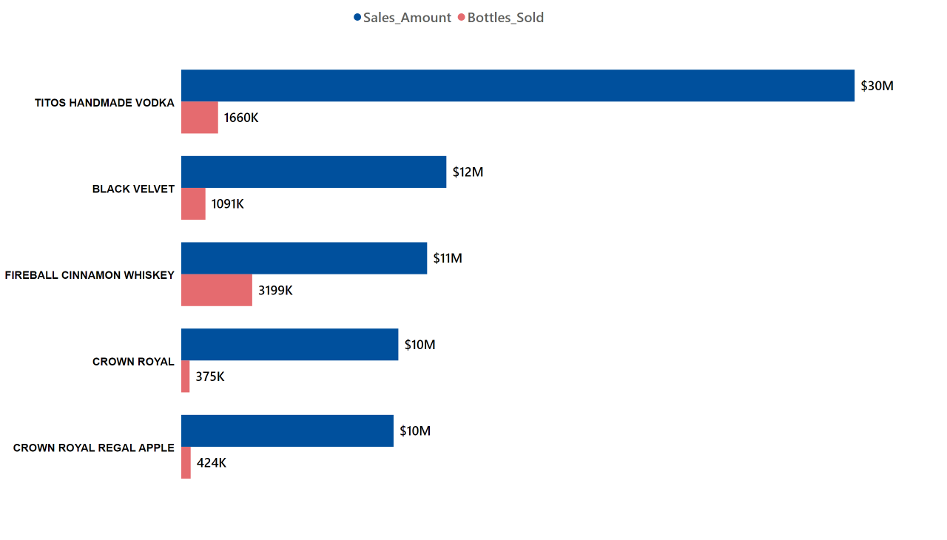

In [61]:
display(Image(filename="Graphs/product_graph.png"))

_**Top-Performing Categories:**_
* American Vodkas, Canadian Whiskies, and Straight Bourbon Whiskies are the categories generating  the highest sales revenue.
* This information identifies the products to prioritize in regards to the inventory management for Iowa locations.


| **Category**                 | **Total Sales**  | **Total Bottles Sold** | **Avg Retail Price** |
|------------------------------|------------------|------------------------|----------------------|
| AMERICAN VODKAS              | 66,612,097.84    | 6,515,719              | 10.67                |
| CANADIAN WHISKIES            | 50,751,870.74    | 3,033,711              | 18.31                |
| STRAIGHT BOURBON WHISKIES    | 39,538,170.24    | 1,704,523              | 26.89                |
| 100% AGAVE TEQUILA           | 34,125,513.21    | 1,175,371              | 35.18                |
| WHISKEY LIQUEUR              | 26,533,374.19    | 4,584,549              | 16.76                |


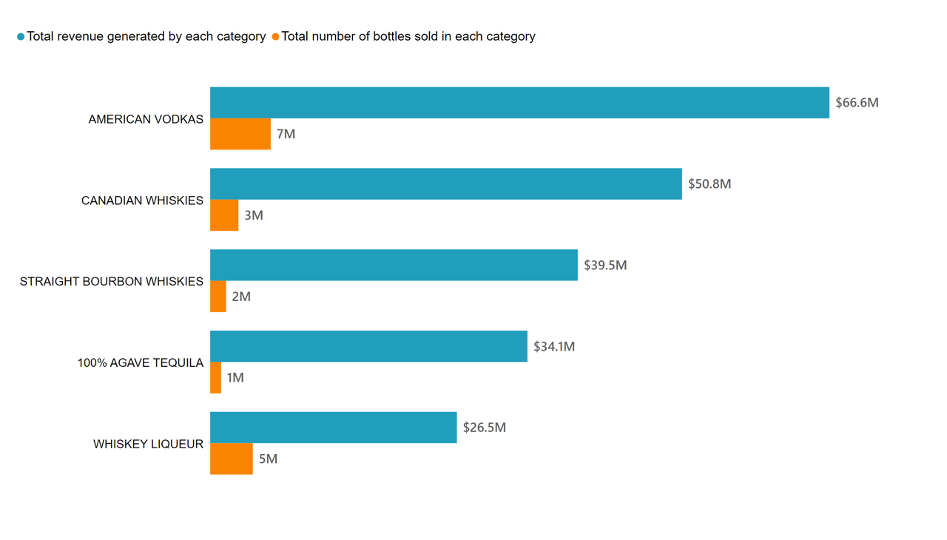

In [62]:
display(Image(filename="Graphs/category_graph.png"))

_**Negative Sales**:_
* Returns or pricing errors with Tito's Handmade Vodka and Crown Royal products suggest areas for operational improvement. Addressing these issues could enhance profitability.
* This insight suggests corrective actions such as renegotiating supplier agreements or adjusting pricing strategies to be considered. 


| **Category**            | **Product Name**             | **Total Negative Sales** | **Transaction Count** |
|-------------------------|------------------------------|--------------------------|-----------------------|
| AMERICAN VODKAS         | TITOS HANDMADE VODKA         | -26,073.23               | 130                   |
| CANADIAN WHISKIES       | BLACK VELVET                 | -12,939.27               | 96                    |
| CANADIAN WHISKIES       | CROWN ROYAL REGAL APPLE      | -12,185.91               | 56                    |
| CANADIAN WHISKIES       | CROWN ROYAL PEACH            | -11,441.70               | 26                    |
| WHISKEY LIQUEUR         | FIREBALL CINNAMON WHISKEY    | -9,804.75                | 92                    |

---

## **2. Seasonal Trends:**
  
_**Best Perfoming day of the week:**_
* Sales peak midweek (Tuesday through Thursday), with lower weekend activity. Operational hours and promotional efforts should capitalize on midweek traffic.


| **Day of Week** | **Day Name** | **Total Revenue** | **Total Bottles Sold** |
|-----------------|--------------|-------------------|------------------------|
| 3               | Wednesday    | 91,994,535.23     | 6,179,139              |
| 4               | Thursday     | 91,293,719.69     | 6,072,042              |
| 2               | Tuesday      | 89,810,011.52     | 6,413,414              |
| 1               | Monday       | 78,934,025.93     | 5,574,721              |
| 5               | Friday       | 69,046,574.31     | 5,096,480              |
| 0               | Sunday       | 16,262,355.06     | 1,338,437              |
| 6               | Saturday     | 7,258,903.60      | 580,023                |





_**Weekday vs Weekend Sales:**_
* Weekday sales significantly outperform weekends, underscoring the importance of weekday promotions and inventory management.


| **Is Weekend** | **Total Sales**   | **Total Bottles Sold** |
|----------------|-------------------|------------------------|
| False          | 421,078,866.68    | 29,335,796             |
| True           | 23,521,258.66     | 1,918,460              |


 

                                                                                            
_**Best Products During Holidays:**_
* Products like Tito's Handmade Vodka and Fireball Cinnamon Whiskey perform exceptionally well during holiday periods, making them ideal products for targeted promotions.


| **Category**           | **Product Name**                     | **Total Sales**  | **Total Bottles Sold** | **Total Volume Sold (Liters)** |
|------------------------|--------------------------------------|------------------|------------------------|-------------------------------|
| AMERICAN VODKAS        | TITOS HANDMADE VODKA                 | 315,277.80       | 17,642                 | 16,925.01                     |
| CANADIAN WHISKIES      | CROWN ROYAL                          | 154,112.39       | 5,317                  | 4,862.13                      |
| CANADIAN WHISKIES      | BLACK VELVET                         | 146,804.27       | 13,188                 | 14,246.21                     |
| TENNESSEE WHISKIES     | JACK DANIELS OLD #7 BLACK LABEL      | 131,595.13       | 4,384                  | 4,374.50                      |
| WHISKEY LIQUEUR        | FIREBALL CINNAMON WHISKEY            | 123,617.50       | 36,232                 | 7,284.39                      |


                                                                                            
_**Best Performing Holidays:**_
* Holidays like Juneteenth and Independence Day see surges in sales, especially for Tito's Handmade Vodka and Fireball Cinnamon Whiskey. Targeted holiday promotions can maximize revenue.

| **Holiday Name**                | **Total Sales**  | **Total Bottles Sold** |
|----------------------------------|------------------|------------------------|
| Juneteenth                       | 1,545,394.78     | 102,776                |
| Independence Day                 | 1,245,840.60     | 75,638                 |
| Veterans' Day                    | 935,372.35       | 75,188                 |
| Columbus Day                     | 351,506.81       | 27,342                 |
| Labor Day                        | 350,864.82       | 29,221                 |
| Martin Luther King Jr. Day       | 245,262.84       | 17,522                 |
| Presidents' Day                  | 208,569.78       | 14,494                 |
| Thanksgiving Day                 | 117,814.47       | 8,257                  |
| New Year's Day                   | 6,277.65         | 457                    |



_**Monthly Sales Trend Visualisation**_

**_Analysis of Sales and Volume Trends (November 2023 – October 2024)_**

1. Key Observations  
- **October Peak:** Highest sales and volume, likely driven by fall holidays.  
- **Spring Recovery:** Sales rise in April and peak in May, reflecting seasonal demand.  
- **Summer Stability:** June to August shows steady performance.  
- **September Dip:** Sales decline, possibly due to post-summer spending adjustments.   


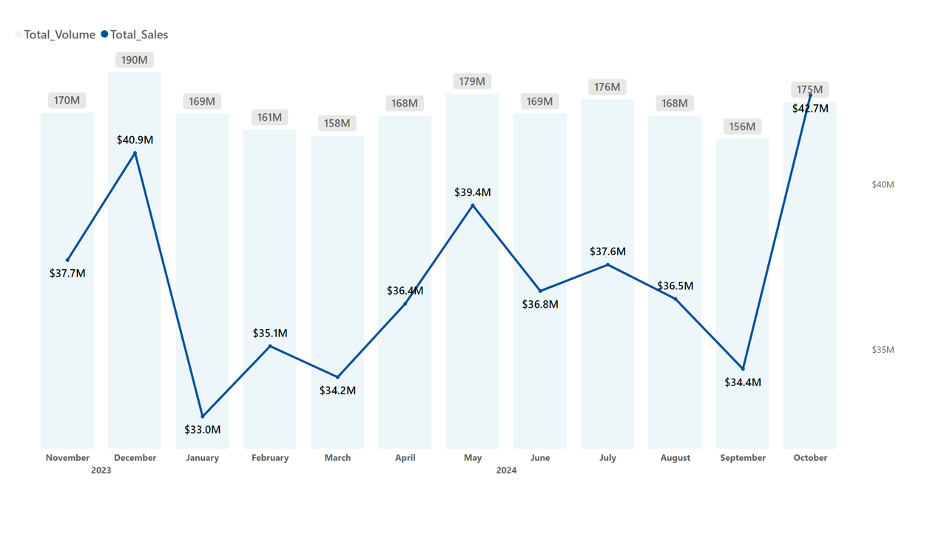

In [63]:
display(Image(filename="Graphs/monthly_graph.png"))


___

## **3. Regional Insights:**
  
_**Sales by County:**_

* Polk County (Des Moines) leads in sales and volume, making it a prime location for the first store. Linn, Scott, Johnson, and Black Hawk counties also exhibit strong demand.


| **County**        | **Total Sales**  | **Total Bottles Sold** |
|-------------------|------------------|------------------------|
| POLK              | 103,418,191.57   | 7,134,745              |
| LINN              | 37,086,577.04    | 2,723,532              |
| SCOTT             | 28,457,272.52    | 2,185,260              |
| JOHNSON           | 24,912,006.76    | 1,589,582              |
| BLACK HAWK        | 22,836,380.40    | 1,740,049              |


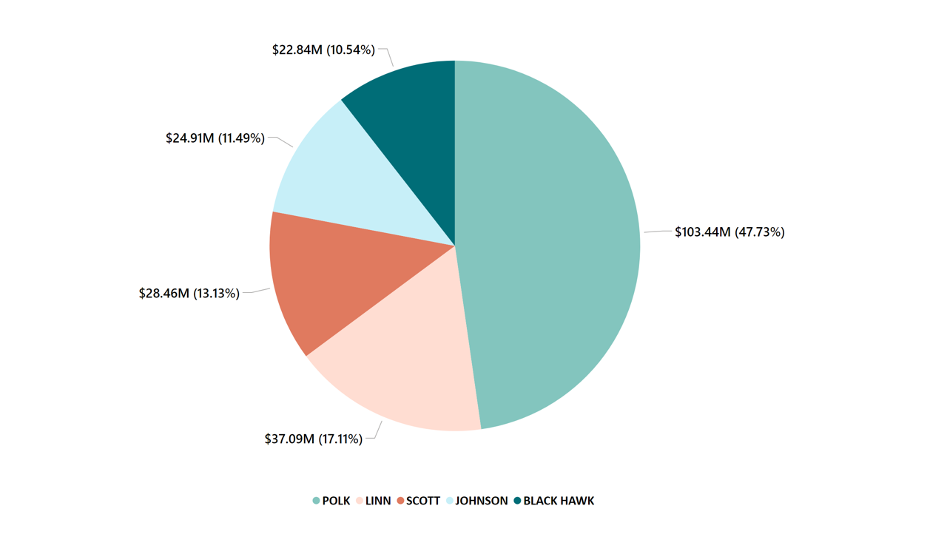

In [64]:
display(Image(filename="Graphs/county_graph.png"))

_**City-Level Performance:**_

- **Urban Demand:** Des Moines, Cedar Rapids, and Davenport dominate sales, making them priority markets.
- **Des Moines Lead:** Highest sales and volume, ideal for scaling or new stores.
- **Growth Markets:** West Des Moines and Council Bluffs show steady potential.
- **Focus:** Urban centers drive demand and should be the primary expansion targets.




| **City**            | **Total Sales**  | **Total Bottles Sold** | **Total Volume Sold (Liters)** |
|---------------------|------------------|------------------------|-------------------------------|
| DES MOINES          | 53,298,576.47    | 3,861,060              | 2,530,772.96                  |
| CEDAR RAPIDS        | 28,103,343.32    | 2,044,834              | 1,457,720.12                  |
| DAVENPORT           | 20,838,876.00    | 1,675,345              | 1,097,946.07                  |
| WEST DES MOINES     | 19,695,392.93    | 1,093,041              | 913,961.11                    |
| COUNCIL BLUFFS      | 15,046,564.15    | 1,121,653              | 748,939.22                    |


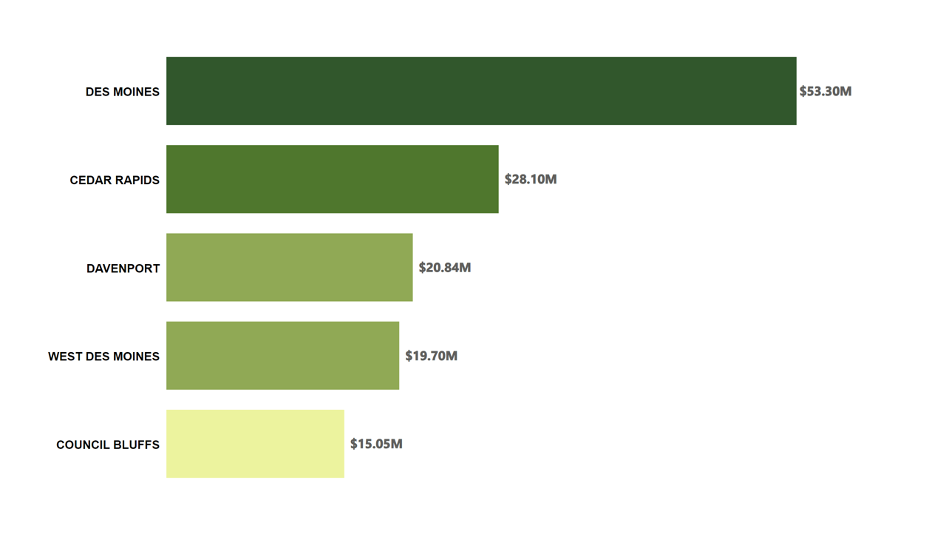

In [65]:
display(Image(filename="Graphs/city_graph.png"))


_**Top Stores:**_ 

Hy-Vee #3 and Central City 2 success can be atributed to:

- **Large Footprint:** Ample space to stock diverse inventory and reduce stockouts.
- **Prime Location:** Centralized in Des Moines, attracting high traffic.
- **Economies of Scale:** Competitive pricing and promotions drive customer loyalty.
- **Convenience:** One-stop shopping for liquor and other items boosts sales.
- **Effective Promotions:** Strong marketing and vendor partnerships enhance visibility.
- **Operational Efficiency:** Optimized supply chains and experienced staff ensure smooth operations.



| **Store**                                     | **City**      | **Total Sales**  | **Total Bottles Sold** | **Distinct Transactions** |
|-----------------------------------------------|---------------|------------------|------------------------|---------------------------|
| HY-VEE #3 / BDI / DES MOINES                 | DES MOINES    | 14,555,457.11    | 757,864                | 19,691                    |
| CENTRAL CITY 2                                | DES MOINES    | 13,645,852.79    | 702,123                | 20,786                    |
| ANOTHER ROUND / DEWITT                       | DEWITT        | 6,562,379.84     | 327,011                | 11,629                    |
| HY-VEE WINE AND SPIRITS #1 (1281) / IOWA CITY | IOWA CITY     | 5,980,446.97     | 378,261                | 9,521                     |
| BENZ DISTRIBUTING                             | CEDAR RAPIDS  | 5,164,441.01     | 266,457                | 15,678                    |


_**County Heat Map**_ 

**Distribution Center Strategy**
- **Open a Centralized Hub:** Establish a distribution center near high-performing counties (e.g., Cedar Rapids or Des Moines) to:
   - Reduce logistics costs.
   - Ensure faster restocking for high-demand areas.
   - Support expansion into neighboring regions.

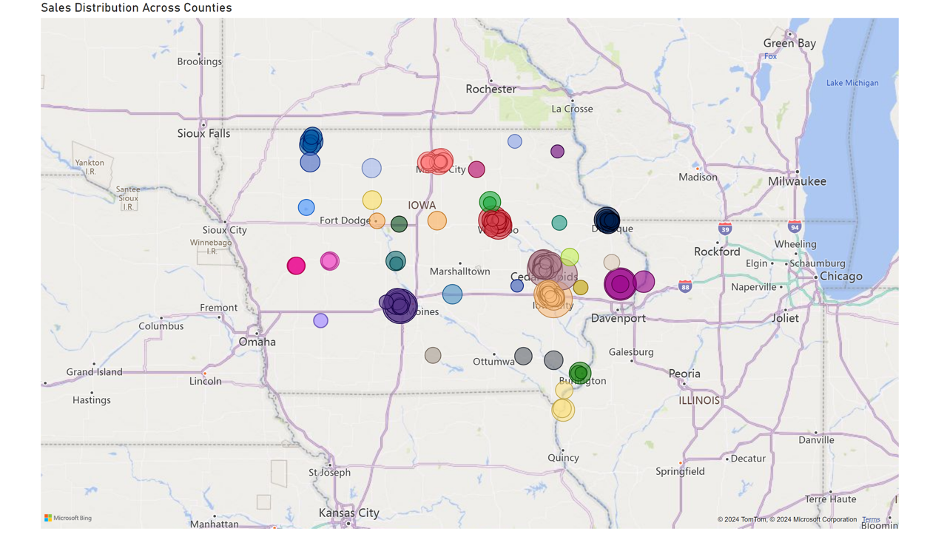

In [66]:
display(Image(filename="Graphs/county_heat_map.png"))

_**Targeting Underserved Areas:**_
 - Mount Vernon and Arnolds Park demonstrate high average sales per store, signaling opportunities in underserved markets. Cities like LeClaire and Floyd, with only one store each, present untapped potential for growth. 

_**Mount Vernon:**_
High average sales per store for about  1.16M(dollars) across 3 stores. Strong market demand with minimal competition.
Arnolds Park: Average sales per store approximately $ 636K, supported by consistent volume demand of 32,163 liters per store. Excellent opportunity for scaling operations.
    
_**Arnolds Park:**_ Average sales per store approximately 636K (dollars), supported by consistent volume demand of 32,163 liters per store. Excellent opportunity for scaling operations.
LeClaire: A single store generating $ 264K in total sales. Untapped potential for additional store openings.
    
_**Floyd:**_ Single store achieving $ 262K in total sales with an average volume sold of 14,895 liters. Promising location with potential to expand and capture more market share.


| **City**         | **Store Count** | **Total Sales**  | **Avg Sales per Store** | **Total Volume Sold (Liters)** | **Avg Volume per Store** |
|------------------|-----------------|------------------|-------------------------|-------------------------------|--------------------------|
| MOUNT VERNON     | 3               | 3,498,921.36     | 1,166,307.12            | 210,083.90                    | 70,027.97                |
| ARNOLDS PARK     | 3               | 1,909,477.13     | 636,492.38              | 96,490.52                     | 32,163.51                |
| LECLAIRE         | 1               | 264,106.44       | 264,106.44              | 8,496.00                      | 8,496.00                 |
| HUMBOLDT         | 4               | 1,055,818.93     | 263,954.73              | 61,858.02                     | 15,464.51                |
| FLOYD            | 1               | 262,768.06       | 262,768.06              | 14,895.77                     | 14,895.77                |
| MT PLEASANT      | 2               | 497,423.83       | 248,711.92              | 31,491.06                     | 15,745.53                |
| CLEARLAKE        | 3               | 728,201.28       | 242,733.76              | 37,105.26                     | 12,368.42                |
| SWISHER          | 2               | 428,462.53       | 214,231.27              | 11,680.51                     | 5,840.26                 |
| BANCROFT         | 2               | 412,182.59       | 206,091.30              | 22,129.06                     | 11,064.53                |
| ST LUCAS         | 1               | 192,684.44       | 192,684.44              | 11,322.20                     | 11,322.20                |

---

# Final Recommendations for Northfield Holdings Ltd

### 1. **Focus on High-Performing Markets**
- **Target Urban Centers:** Prioritize store openings in Des Moines, Cedar Rapids, and Davenport.
- **Leverage Top Counties:** Expand operations in Polk, Linn, Scott, and Johnson counties to capture high sales volumes.

### 2. **Capitalize on Bestselling Products and Categories**
- **Stock Bestsellers:** Focus on Tito's Handmade Vodka, Fireball Cinnamon Whiskey, and Black Velvet Canadian Whiskey.
- **Key Categories:** Prioritize American Vodkas, Canadian Whiskies, and Straight Bourbon Whiskies.

### 3. **Seasonal and Weekly Trends**
- **Holiday Promotions:** Target key holidays like Juneteenth, Independence Day, and Veterans’ Day for revenue spikes.
- **Midweek Strategy:** Align marketing efforts for peak sales days (Tuesday to Thursday).

### 4. **Expand Into Underserved Markets**
- **Smaller Cities:** Explore Mount Vernon, Arnolds Park, LeClaire, and Floyd, where sales per store are high with minimal competition.

### 5. **Learn from Successful Box Stores**
- Adopt strategies from Hy-Vee #3 and Central City 2 in Des Moines: large inventory, efficient supply chains, and targeted promotions.

### 6. **Address Operational Issues**
- Improve inventory management to reduce negative sales and optimize product mixes for local markets.

### 7. **Monthly Sales Insights**
- **October Peak:** Strongest sales month due to fall demand.
- **Spring Growth:** Sales recover in April and May.
- **Summer Stability:** Steady performance from June to August.
- **September Dip:** Target promotions to address post-summer slowdowns.

### 8. **Distribution Center Strategy**
- **Open a Centralized Hub:** Establish a distribution center near high-performing counties (e.g., Cedar Rapids or Des Moines) to:
   - Reduce logistics costs.
   - Ensure faster restocking for high-demand areas.
   - Support expansion into neighboring regions.

---

## Next Steps
- Conduct deeper regional analysis and pilot stores in key markets like Des Moines.
- Build strong supplier partnerships to maintain competitive pricing and product availability.
- Develop a distribution strategy to streamline operations and improve market coverage.

By implementing these recommendations, Northfield Holdings Ltd can ensure a successful and sustainable expansion into Iowa.


___